# Errors and Exceptions Tutorial
This notebook demonstrates the use of Errors and Exceptions for users who are not familiar with these Python concepts.  
It also shows how **to recover from a crashed simulation in a notebook**.

### The code example
We will use simple code that extends a growing branch, refer to the **Getting Started** section of the **Beginner's Tutorial** in the documentation for an explanation of this code. Try running this a few times.

<IPython.core.display.Javascript object>


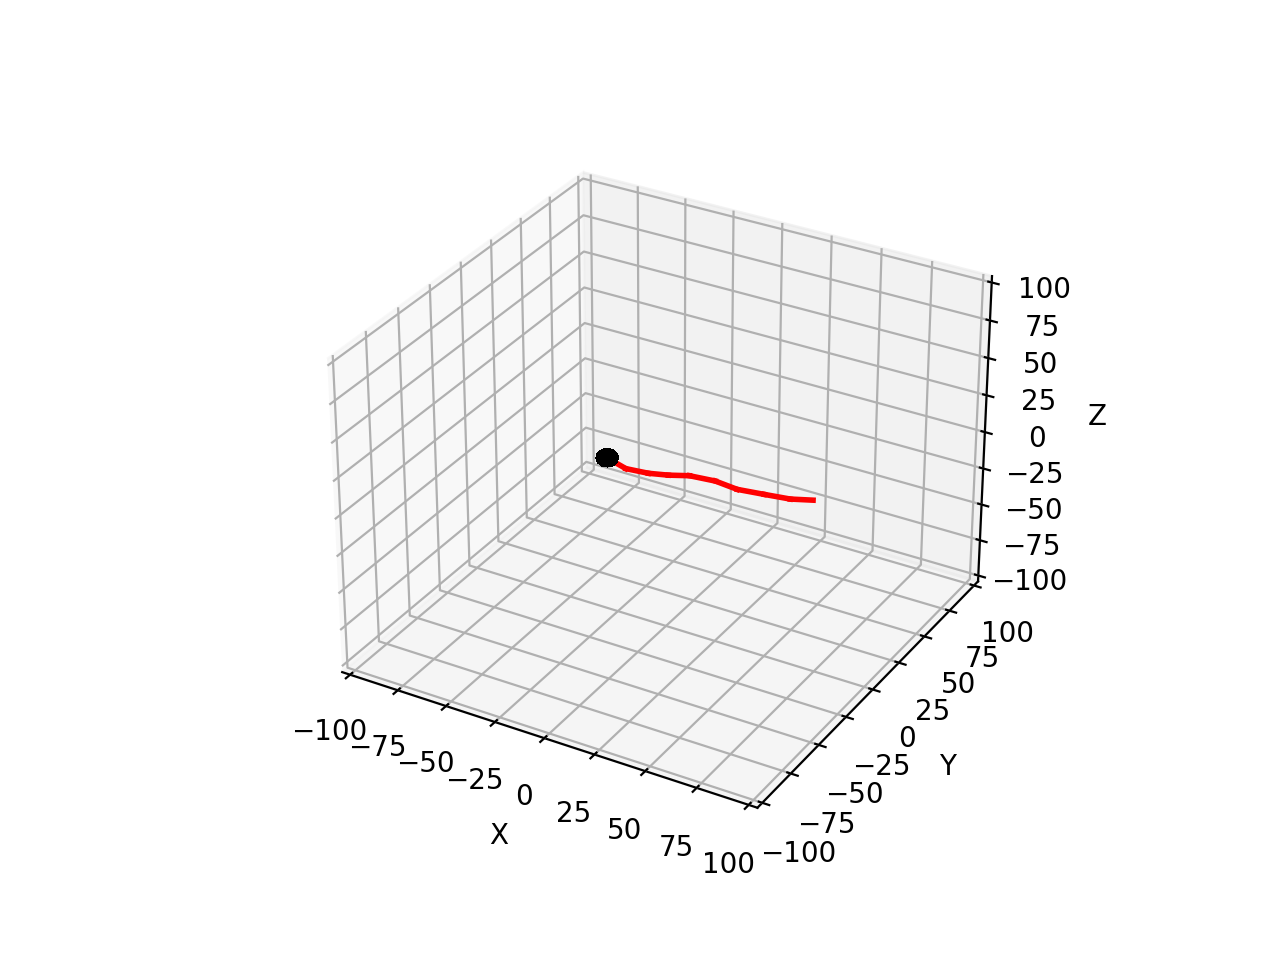

In [1]:
%matplotlib notebook

from neurodevsim.simulator import *

class RandomFront(Front):
    
    def manage_front(self,constellation):
        if self.path_length < 100: # continue growth
            # extend towards right with a bit of noise
            new_pos = self.end + Point(10.,0.,0.) +  unit_sample_on_sphere() * 3.0
            new_front = self.add_child(constellation,new_pos,radius=1.) # make a new front which will grow
        self.disable(constellation) # make calling front inactive: stops growing

if __name__ == '__main__':

    # initialize Admin_agent
    fname = "output/random.db"
    sim_volume = [[-100., -100., -100.], [100.0,100.0,100.0]]
    neuron_types = [RandomFront]
    admin = Admin_agent(2,fname,sim_volume,neuron_types,verbose=0,plot=True)

    # make soma at fixed position and set neuron name
    admin.add_neurons(RandomFront,"rand_neuron",1,[[-30.,0.,0.],[-30,0.,0.]],5.)
    
    # run the simulation
    admin.simulation_loop(25)

    # clean up
    admin.destruction()

### Introducing an error and recovering from it
We'll now run the example code with an error: a negative radius in the ``add_child`` method.  Note how this makes the code crash with a ``neurodevsim.simulator.ValueError`` and an explanation of the error.
You do not have to run this code but if you do, please read instructions below on how to recover notebook functionality.

<IPython.core.display.Javascript object>


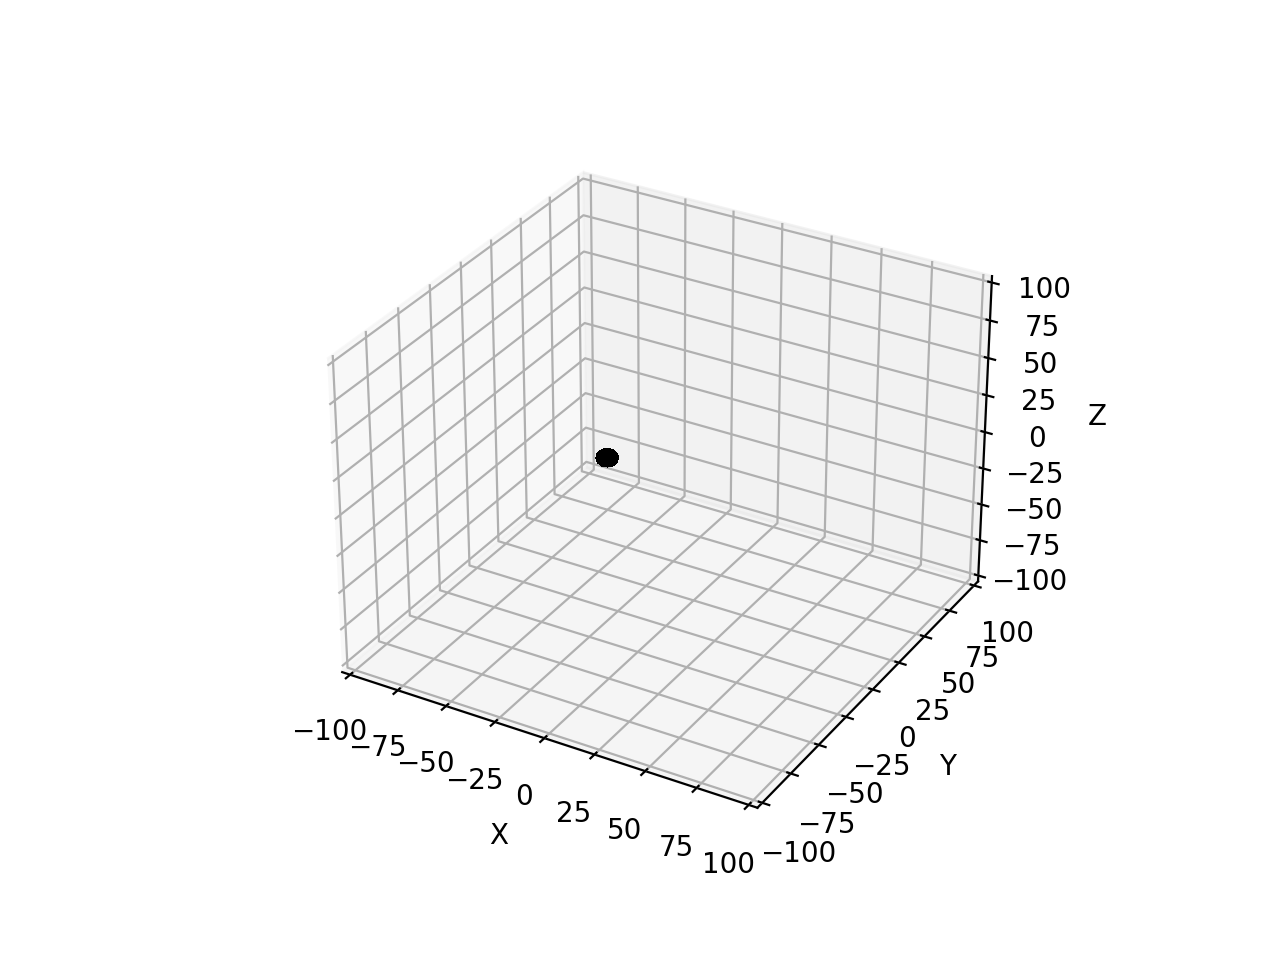

Process Process-4:
Traceback (most recent call last):
  File "/Users/erik/miniforge3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/erik/miniforge3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/erik/Documents/nds/NeuroDevSim/neurodevsim/simulator.py", line 7249, in _proc_init
    proc._proc_loop()
  File "/Users/erik/Documents/nds/NeuroDevSim/neurodevsim/simulator.py", line 7172, in _proc_loop
    front.manage_front(self.constellation)
  File "/var/folders/_s/zltp2k9d6s3_jp7b99vpmylh0000gn/T/ipykernel_6853/2640015348.py", line 11, in manage_front
    new_front = self.add_child(constellation,new_pos,radius=-1.) # make a new front which will grow
  File "/Users/erik/Documents/nds/NeuroDevSim/neurodevsim/simulator.py", line 782, in add_child
    child = constellation._enter_front(self,cylinder,coordinate,rad,\
  File "/Users/erik/Documents/nds/NeuroDevSim/neurodevsi

In [ ]:
%matplotlib notebook

from neurodevsim.simulator import *

class RandomFront(Front):
    
    def manage_front(self,constellation):
        if self.path_length < 100: # continue growth
            # extend towards right with a bit of noise
            new_pos = self.end + Point(10.,0.,0.) +  unit_sample_on_sphere() * 3.0
            new_front = self.add_child(constellation,new_pos,radius=-1.) # make a new front which will grow
        self.disable(constellation) # make calling front inactive: stops growing

if __name__ == '__main__':

    # initialize Admin_agent
    fname = "output/random.db"
    sim_volume = [[-100., -100., -100.], [100.0,100.0,100.0]]
    neuron_types = [RandomFront]
    admin = Admin_agent(2,fname,sim_volume,neuron_types,verbose=0,plot=True)

    # make soma at fixed position and set neuron name
    admin.add_neurons(RandomFront,"rand_neuron",1,[[-30.,0.,0.],[-30,0.,0.]],5.)
    
    # run the simulation
    admin.simulation_loop(25)

    # clean up
    admin.destruction()

## Recovering from a crashed simulation in a notebook
Although the simulator crashed several of its processes are still running: the little ball circle of Python 3 at the top right of the page is still black and your fan may be working to cool the computer.  
You now need to kill all NeuroDevSim processes before you can continue:  kill the processes by pressing the curved arrow icon at the top of the page: you will get a popup window asking to restart the kernel, press Restart and this will kill all active processes (the circle is now empty).

### Using exceptions to catch the error
Obviously it is better to avoid code crashes...  
Here we will use the Python **Exceptions** (https://docs.python.org/3/tutorial/errors.html) paradigm to catch the error.  
The ``add_child`` method is put in a ``try:`` clause followed by a ``except:`` clause. NeuroDevSim tries to execute ``add_child``, if successful it skips the ``except:`` clause. But if an error occurs it executes the code in the ``except:`` clause that prints the error message. The big advantage is that the code does not crash!

<IPython.core.display.Javascript object>


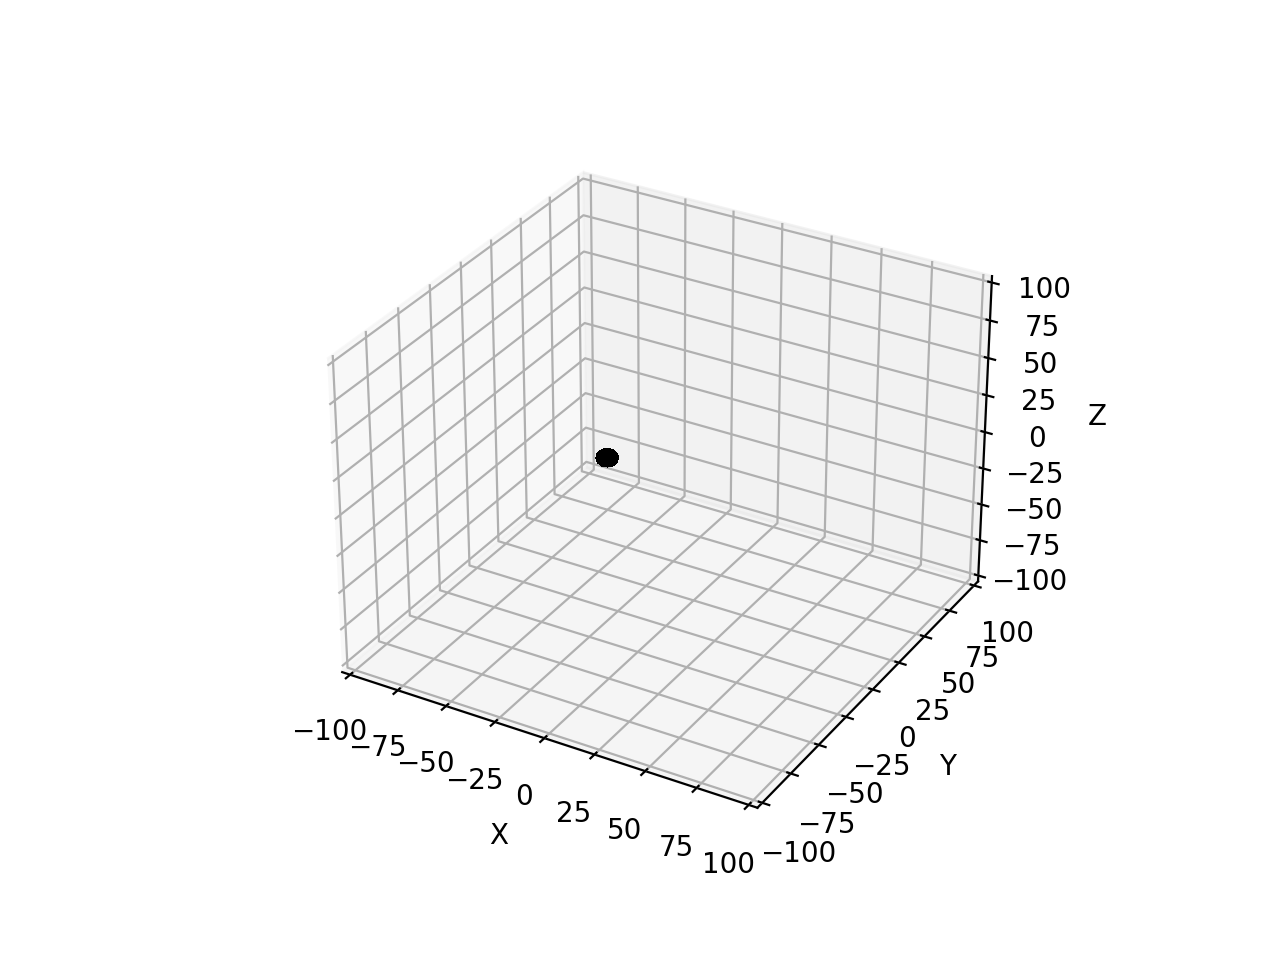

Inappropriate value for radius: should be larger than zero.


In [1]:
%matplotlib notebook

from neurodevsim.simulator import *

class RandomFront(Front):
    
    def manage_front(self,constellation):
        if self.path_length < 100: # continue growth
            # extend towards right with a bit of noise
            new_pos = self.end + Point(10.,0.,0.) +  unit_sample_on_sphere() * 3.0
            try:
                new_front = self.add_child(constellation,new_pos,radius=-1.) # make a new front which will grow
                # optionally execute other code if new front was made
            except Exception as error:
                # no new front was made
                print(str(error))
        self.disable(constellation) # make calling front inactive: stops growing

if __name__ == '__main__':

    # initialize Admin_agent
    fname = "output/random.db"
    sim_volume = [[-100., -100., -100.], [100.0,100.0,100.0]]
    neuron_types = [RandomFront]
    admin = Admin_agent(2,fname,sim_volume,neuron_types,verbose=0,plot=True)

    # make soma at fixed position and set neuron name
    admin.add_neurons(RandomFront,"rand_neuron",1,[[-30.,0.,0.],[-30,0.,0.]],5.)
    
    # run the simulation
    admin.simulation_loop(25)

    # clean up
    admin.destruction()

### A less predictable error
The example above was a true error: you want the code to catch these and tell you clearly what went wrong so it may be better to have the code stop in this instance to get the full error message.  
But in a complex simulation problems may arise that are difficult to predict *a priori* but easy to fix, like in this example. 

<IPython.core.display.Javascript object>


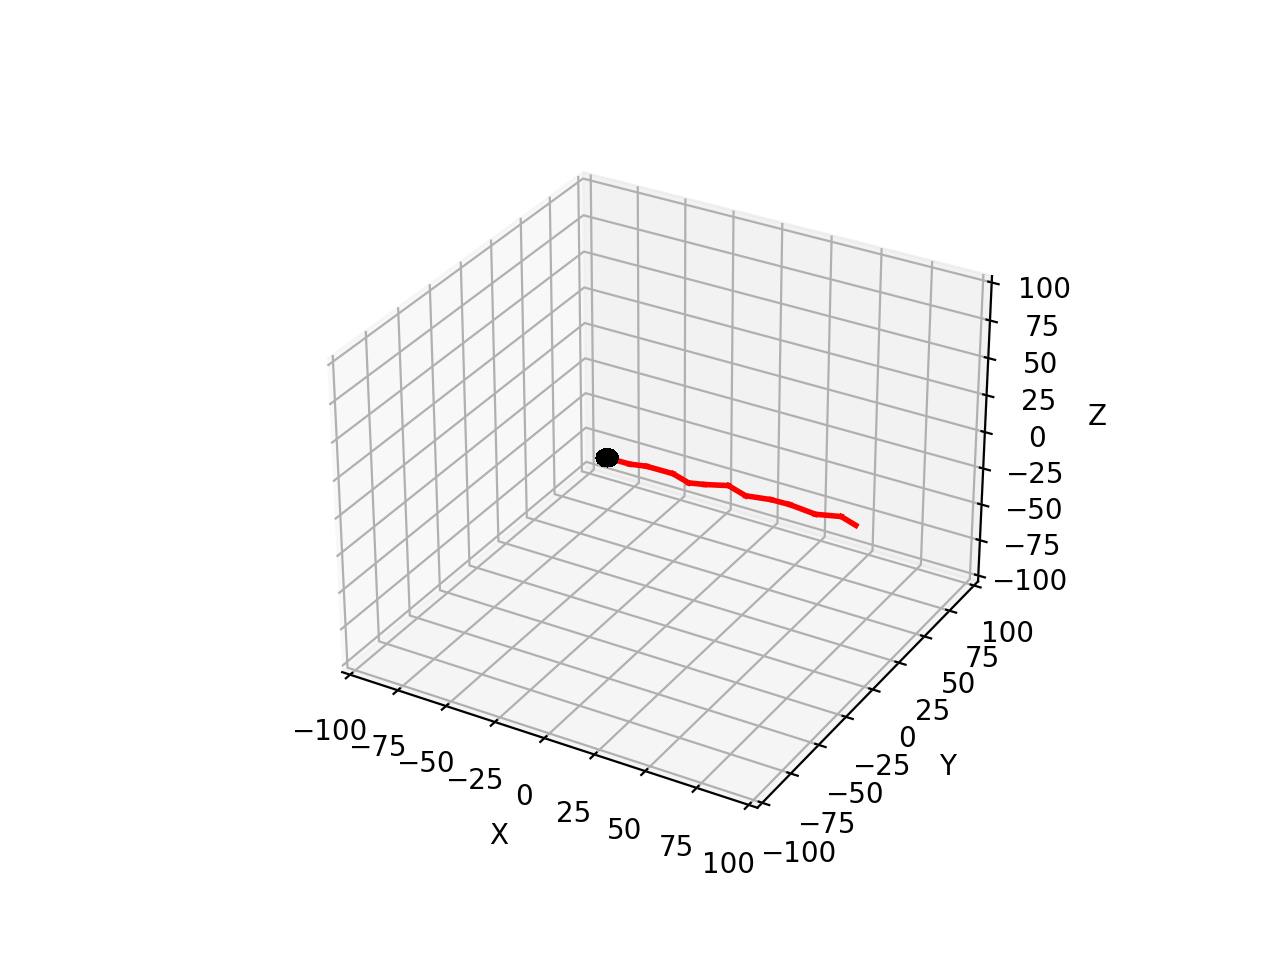

Point is outside the simulation volume for coordinate 102.63.


In [2]:
%matplotlib notebook

from neurodevsim.simulator import *

class RandomFront(Front):
    
    def manage_front(self,constellation):
        if self.path_length < 200: # continue growth
            # extend towards right with a bit of noise
            new_pos = self.end + Point(10.,0.,0.) +  unit_sample_on_sphere() * 3.0
            try:
                new_front = self.add_child(constellation,new_pos,radius=1.) # make a new front which will grow
                # optionally execute other code if new front was made
            except Exception as error:
                # no new front was made
                print(str(error))
        self.disable(constellation) # make calling front inactive: stops growing

if __name__ == '__main__':

    # initialize Admin_agent
    fname = "output/random.db"
    sim_volume = [[-100., -100., -100.], [100.0,100.0,100.0]]
    neuron_types = [RandomFront]
    admin = Admin_agent(2,fname,sim_volume,neuron_types,verbose=0,plot=True)

    # make soma at fixed position and set neuron name
    admin.add_neurons(RandomFront,"rand_neuron",1,[[-30.,0.,0.],[-30,0.,0.]],5.)
    
    # run the simulation
    admin.simulation_loop(25)

    # clean up
    admin.destruction()

What happened? By increasing the allowed *path_length* to 200 µm we allowed the growing process to reach the border of the simulation volume and try to grow outside it, resulting in a ``neurodevsim.simulator.VolumeError``.  
NeuroDevSim has a large set or Errors defined, listed in Documentation. Some of these can happen in almost any context, like ``BugError``, ``TypeError`` or ``ValueError`` and it is often better not to try to catch these to get detailed error messages. But others are method specific and good simulation code should catch and process some of these.  
For the ``add_child`` method it makes sense to catch the following errors in ``try ... except ...`` clauses:
- ``CollisionError``: handling collisions between growing fronts is an important task in NeuroDevSim simulations.
- ``GridCompetitionError``: this difficult to avoid error is explained in the Documentation, the best strategy is often to keep trying.
- ``InsideParentError``: an illegal *coordinate* was given, child fronts cannot grow into their parent. This could be avoided by checking *coordinate* in advance but as the method checks anyway there is no need.
- ``VolumeError``: an illegal *coordinate* outside the simulation volume was given. This could be avoided by checking *coordinate* in advance but as the method checks anyway there is no need.

### Code catching specific errors
Here the 4 errors listed above are caught, other types of error (like a negative diameter) will still cause a crash. No specific error handling code is included.

<IPython.core.display.Javascript object>


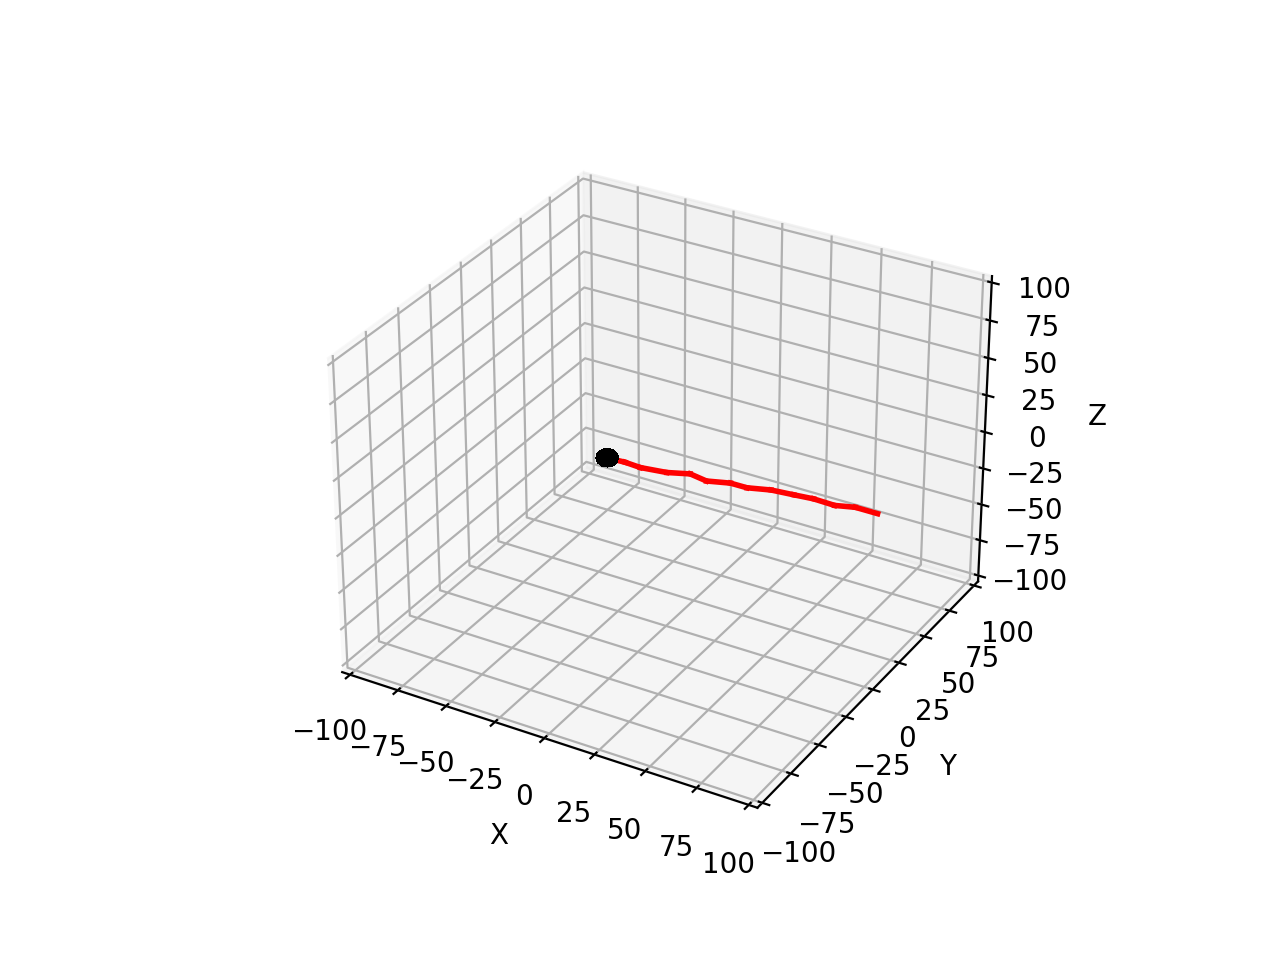

cycle 14 : Point is outside the simulation volume for coordinate 104.73.


In [3]:
%matplotlib notebook

from neurodevsim.simulator import *

class RandomFront(Front):
    
    def manage_front(self,constellation):
        if self.path_length < 200: # continue growth
            # extend towards right with a bit of noise
            new_pos = self.end + Point(10.,0.,0.) +  unit_sample_on_sphere() * 3.0
            try:
                new_front = self.add_child(constellation,new_pos,radius=1.) # make a new front which will grow
                # optionally execute other code if new front was made
            except (CollisionError,GridCompetitionError,InsideParentError,VolumeError) as error:
                # no new front was made
                print("cycle",constellation.cycle,":",error)
        self.disable(constellation) # make calling front inactive: stops growing

if __name__ == '__main__':

    # initialize Admin_agent
    fname = "output/random.db"
    sim_volume = [[-100., -100., -100.], [100.0,100.0,100.0]]
    neuron_types = [RandomFront]
    admin = Admin_agent(2,fname,sim_volume,neuron_types,verbose=0,plot=True)

    # make soma at fixed position and set neuron name
    admin.add_neurons(RandomFront,"rand_neuron",1,[[-30.,0.,0.],[-30,0.,0.]],5.)
    
    # run the simulation
    admin.simulation_loop(25)

    # clean up
    admin.destruction()

### Example with error handling code
Here the RandomFront code that contains simple error handling is copied. Print statements have been added to report the error handling.
It is worth running this several times because different errors are being caught.

NeuroDevSim 1.0.0 starting on 4 cores


<IPython.core.display.Javascript object>


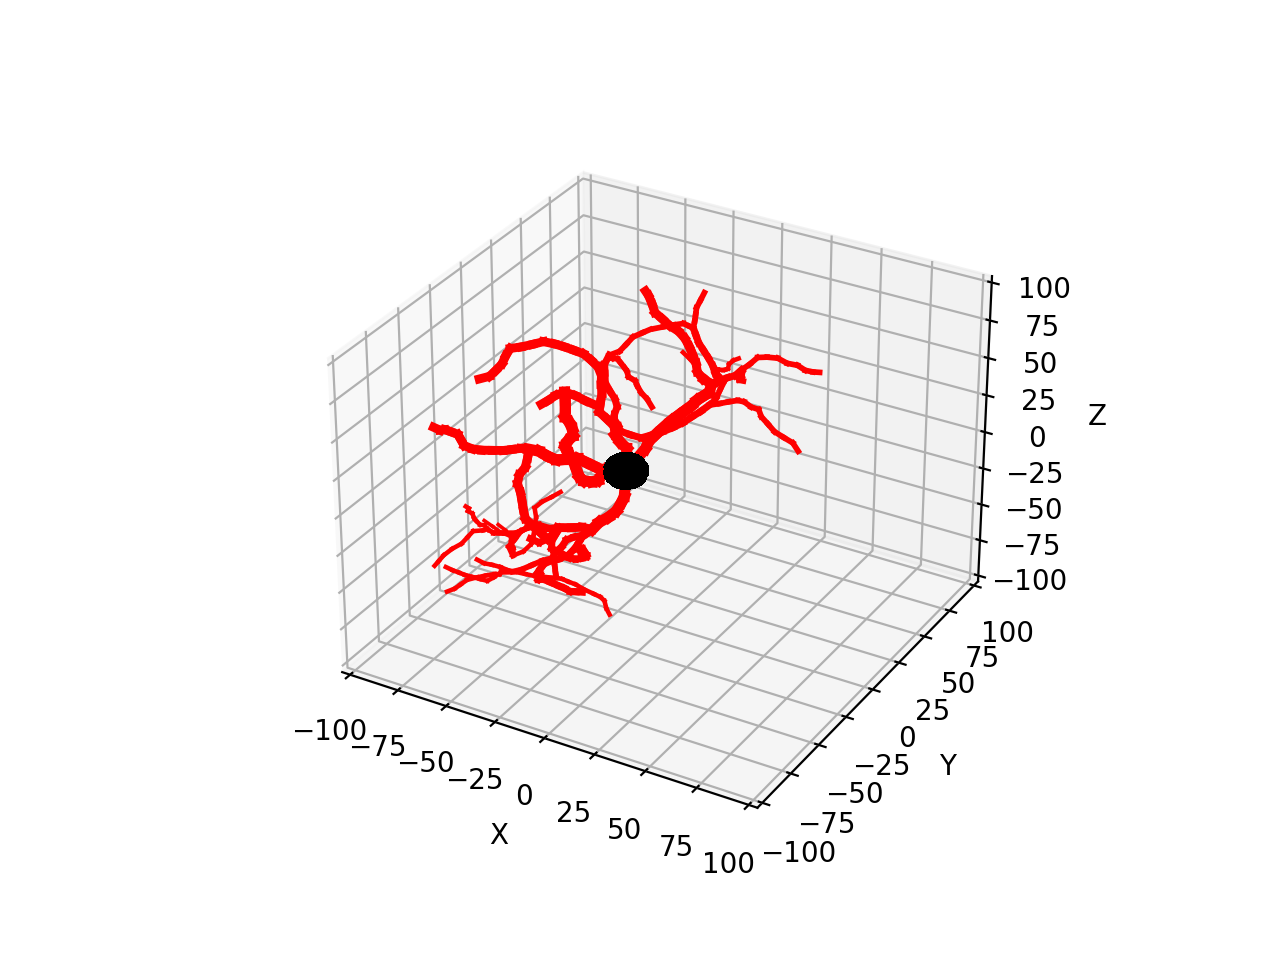

NeuroDevSim admin starting cycle 1 
NeuroDevSim admin starting cycle 2 
NeuroDevSim admin starting cycle 3 
NeuroDevSim admin starting cycle 4 
NeuroDevSim admin starting cycle 5 
NeuroDevSim admin starting cycle 6 
NeuroDevSim admin starting cycle 7 
NeuroDevSim admin starting cycle 8 
NeuroDevSim admin starting cycle 9 
NeuroDevSim admin starting cycle 10 
NeuroDevSim admin starting cycle 11 
NeuroDevSim admin starting cycle 12 
NeuroDevSim admin starting cycle 13 
NeuroDevSim admin starting cycle 14 
NeuroDevSim admin starting cycle 15 
Error generated by  Growing front 13421 (1): [20.88, 14.40, 60.73] [22.47, 10.72, 63.72] radius: 0.82 path_length: 95.00 swc: 3 order: 5, parent: 13410 with 0 children, soma 1, made at 17 (7 66871)
    Grid competition error for grid id 801.
Error generated by  Growing front 13434 (1): [-39.13, -44.51, -56.20] [-39.07, -40.34, -58.95] radius: 1.28 path_length: 105.00 swc: 3 order: 3, parent: 13423 with 0 children, soma 1, made at 19 (7 -66902)NeuroDe

In [1]:
%matplotlib notebook

from neurodevsim.simulator import *
import numpy as np

class RandomFront(Front):
    
    def manage_front(self,constellation):
        if self.order == 0: # soma: make 5 dendrite roots
            points = self.unit_branching_sample(10) # generate more points than needed
            num_dend = 0 # count number of dendrites
            for p in points: # make 5 dendrites
                new_pos = self.orig + p * 15. # compute position of dendrite end
                # check for possible collisions
                try:
                    new_front = self.add_child(constellation,new_pos,radius=2.) # make a new front and store it
                    num_dend += 1
                    if num_dend == 5: # enough dendrites made
                        # make soma inactive: stops growing -> will not call this method again
                        self.disable(constellation)
                        return # completed this call
                except (CollisionError, GridCompetitionError, InsideParentError, VolumeError) as error:
                    print ("Error generated by ",self)
                    print ("   ",error)
                    continue # pick another new_pos, no attempt to correct the error
            print ("Warning: less than 5 dendrites made for",self.get_neuron_name(constellation),num_dend)
            # make soma inactive: stops growing -> will not call this method again
            self.disable(constellation)
            
        elif self.path_length < 150: # continue growth of a dendrite or branch it
            if np.random.random() > 0.06: # most probable: extend with a single front
                count = 0 # counts number of add_child trials
                while count < 10:
                    extension = self.unit_heading_sample(width=20)
                    new_pos = self.end + extension * 5. # compute position of child end
                    # check for possible collisions
                    try:
                        new_front = self.add_child(constellation,new_pos) # make a new front and store it
                        # make front inactive: stops growing -> will not call this method again
                        self.disable(constellation)
                        return # done for this cycle
                    except (CollisionError, GridCompetitionError, InsideParentError) as error:
                        print ("Error generated by ",self)
                        print ("   ",error)
                        count += 1
                        continue # pick another new_pos, no attempt to correct the error
                    except VolumeError as error:
                        print ("Error generated by ",self)
                        print ("   ",error)
                        self.disable(constellation) # stop growth
                        return # done for this cycle
                print ("Warning: failed extension for dendrite of",self.get_neuron_name(constellation))
                if (constellation.cycle - self.birth) > 2: # this was second failed attempt:
                    self.disable(constellation) # stop trying
            else: # branch with low probability
                points = self.unit_branching_sample(5) # generate more points than needed
                rad = self.taper(0.8) # decrease radius
                num_dend = 0 # count number of dendrite branches
                for p in points: # make 2 branches
                    new_pos = self.end + p * 5.  # compute position of child end
                    # check for possible collisions
                    try:
                        new_front = self.add_child(constellation,new_pos,radius=rad) # make a new front and store it
                        num_dend += 1
                        if num_dend == 2: # enough dendrites made
                            # make front inactive: stops growing -> will not call this method again
                            self.disable(constellation)
                            return # done for this cycle
                    except (CollisionError, GridCompetitionError, InsideParentError, VolumeError) as error:
                        print ("Error generated by ",self)
                        print ("   ",error)
                        continue # pick another new_pos, no attempt to correct the error
                print ("Warning: failed branching for",self.get_neuron_name(constellation),self.num_children)
                if self.num_children > 0: # single child made -> make front inactive
                    self.disable(constellation)
                    
        else: # reached maximum length -> terminate growth
            self.disable(constellation)

if __name__ == '__main__':

    # initialize Admin_agent
    fname = "output/random.db"
    sim_volume = [[-100., -100., -100.], [100.0,100.0,100.0]]
    neuron_types = [RandomFront]
    admin = Admin_agent(2,fname,sim_volume,neuron_types,verbose=1,plot=True)

    # make soma and set neuron name
    admin.add_neurons(RandomFront,"rand_neuron",1,[[-30,-30,-30],[30,30,30]],10.)
    # run the simulation
    admin.simulation_loop(25)

    # clean up
    admin.destruction()